In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
from IPython.display import Image 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor

# House Price Overview

Local authorities in many countries need to predict the market prices of houses to determine property taxes. They can do this by relating the prices of those houses which were sold to features such as number of bedrooms, number of bathrooms, and the neighborhood in which the house is located.


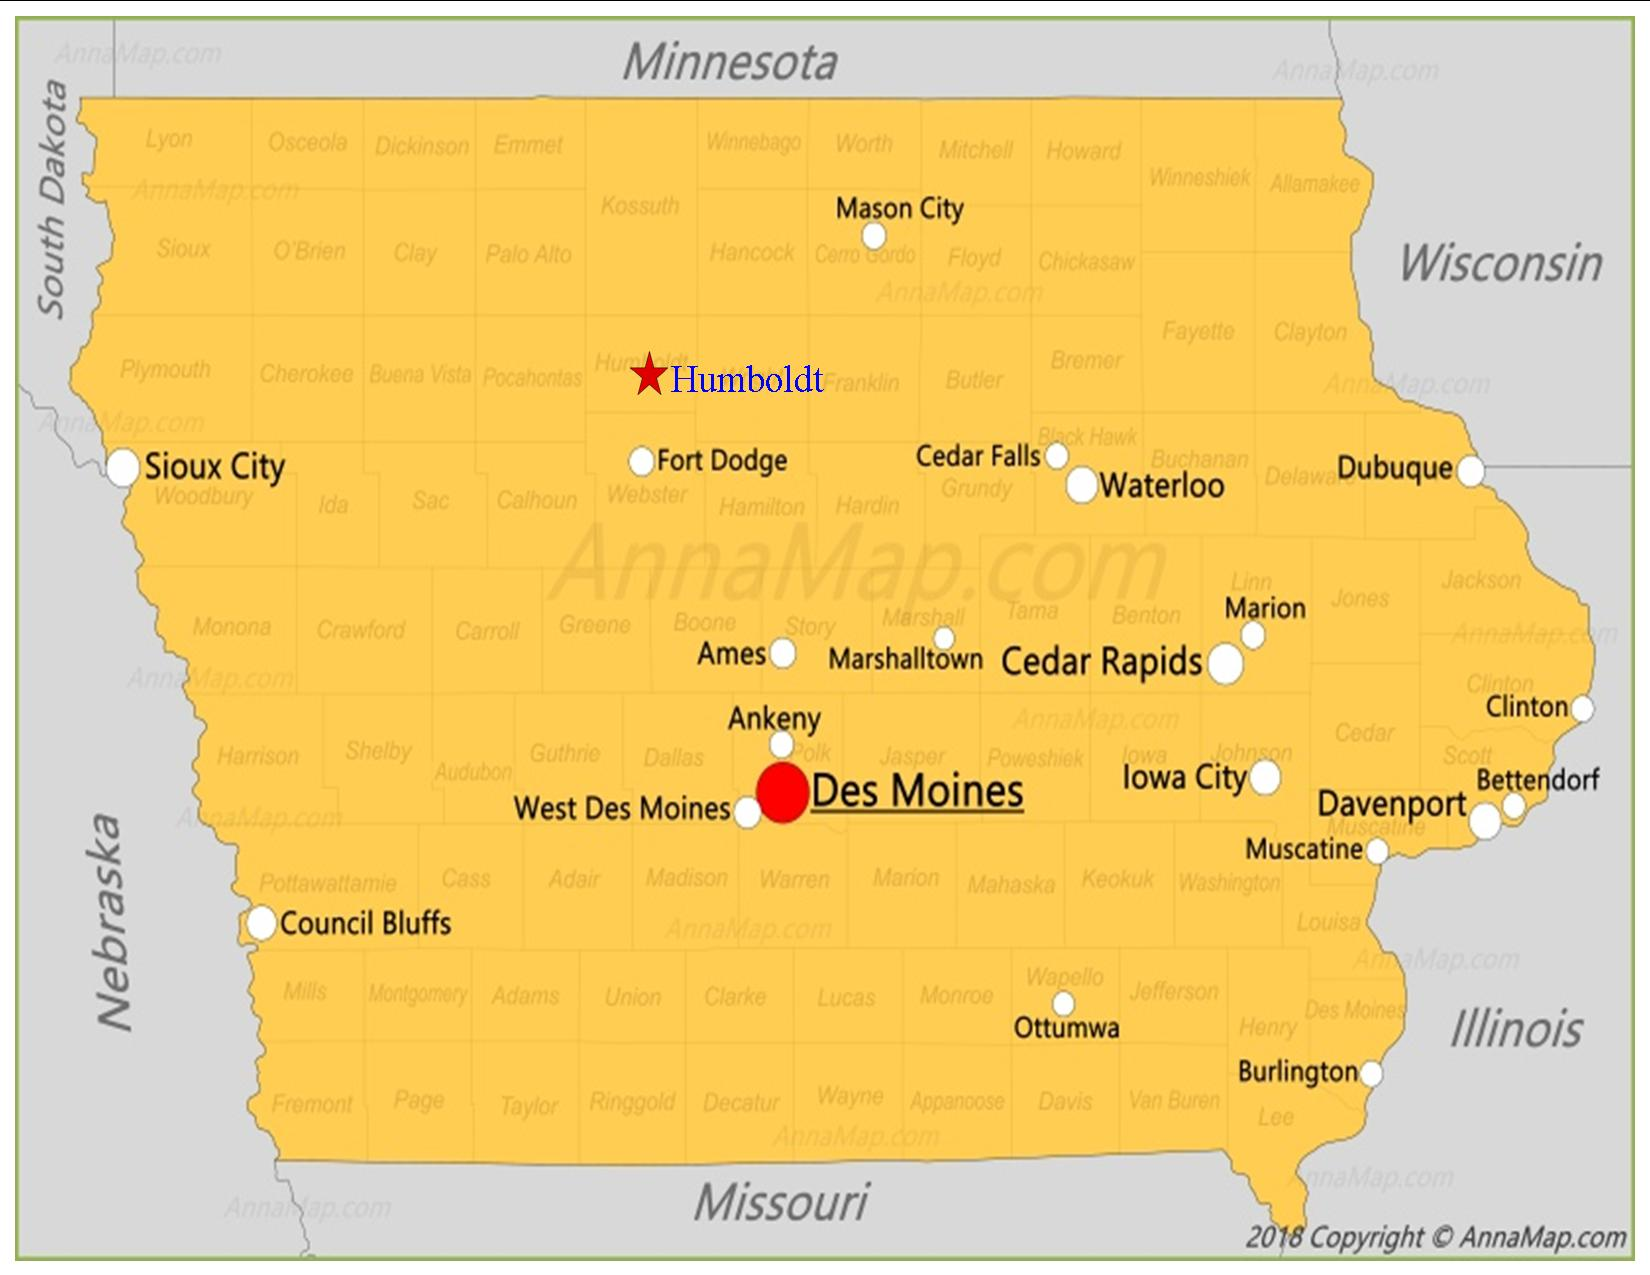

In [2]:
Image(filename='Iowa.jpg')

# Problem Statement


## Regression- predict house price in Iowa
**Gain insights on the parameters that affect the price of houses in Ames, Iowa according to various parameters and build a model that predicts the house price:** <br>

My assumption is that different criteria's types affect the house price:<br>

<br>
- The higher the number of bathrooms> the house price will be higher?
<br>
- The higher the number of bedrooms> the house price will be higher?
<br>
- The higher the finished square feet> the house price will be higher?
<br>
- How the selling year will affect the house price? If my selling year was last year,how it will affect the house price?
<br>
- How the neighborhood will affect the house price? If it is expensive or cheap the house price will be higher?
<br>
- The higher the total number of rooms> the house price will be higher?
<br>
- How the building year will affect the house price? If my building year was 50 years ago,how it will affect the house price?
<br>
- and more...
<br>

**Or Maybe just the total number of rooms and finished square feet affect the house price,and all other parameters don't have extra affect on the house price?** <br>

### Regression work flow

1.  Reading the Datasets
2.  Data cleaning
3.  Feature Engineering
4.  Exploratory data analysis
5.  Creating dummy variables
6.  Split data to Train, Test & Validation sets
7.  Sanity check between full data to train set
8.  Compare all features combinations on simple linear regression models on valid set -->choosing the features for model
9.  Compare RandomForestRegressor model with selected features from step 8 
10. Predict+Evaluate on test set with chosen model
11. Real time predictions




#  The Data 

 * **Iowa_data.csv** - contains house records from 2908 houses sold in Ames, Iowa between 2006 and 2010 <br>
 
The data set was used in Kaggle competition where contestants tried to predict prices for test data.

# Data dictionary 
* **ID**- I.D. of the house
* **MSZONING**- Identifies the general zoning classification of the sale (C stands for Commercial, FV stands for Floating Village Residential, RH stands for Residential High Density, RL stands for Residential Low Density, and RM stands for Residential Medium Density)
* **BATHROOMS**- The number of bathrooms in the house
* **BEDROOMS**- The number of bedrooms in the house
* **FINISHSQFT**- The size of the house in square feet
* **LASTSOLDYEAR**- The year in which the house was sold
* **LASTSOLDPRICE**- The price for which the house was sold
* **NEIGHBORHOOD**- Physical locations within Ames city limits (Blmngtn	Bloomington Heights, Blueste stands for Bluestem, BrDale stands for Briardale, BrkSide stands for Brookside, ClearCr stands for Clear Creek, CollgCr stands for College Creek, Crawfor stands for Crawford, Edwards stands for Edwards, Gilbert stands for Gilbert, IDOTRR stands for Iowa DOT and Rail Road, MeadowV stands for Meadow Village, Mitchel stands for Mitchell, Names stands for North Ames, NoRidge stands for Northridge, NPkVill stands for Northpark Villa, NridgHt stands for Northridge Heights, NWAmes stands for Northwest Ames, OldTown stands for Old Town, SWISU stands for South & West of Iowa State University, Sawyer stands for Sawyer, SawyerW stands for Sawyer West, Somerst stands for Somerset, StoneBr stands for Stone Brook, Timber stands for Timberland, and Veenker stands for Veenker)
* **TOTALROOMS**- Total number of rooms in the house
* **YEARBUILT**- The year in which the house was built



# 1. Reading the Datasets

In [3]:
df_house = pd.read_csv("R.csv")

In [4]:
df_house.columns

Index(['Id', 'mszoning', 'bathrooms', 'bedrooms', 'finishedsqft',
       'lastsoldyear', 'lastsoldprice', 'neighborhood', 'totalrooms',
       'yearbuilt'],
      dtype='object')

In [5]:
df_house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2908.0,1458.581155,842.839815,1.0,729.75,1458.5,2187.25,2919.0
bathrooms,2908.0,3.583563,1.166364,0.0,3.00,3.0,4.00,9.0
bedrooms,2908.0,2.861073,0.822347,0.0,2.00,3.0,3.00,8.0
finishedsqft,2908.0,1494.627235,486.035830,334.0,1125.75,1442.0,1740.50,3820.0
lastsoldyear,2908.0,2007.794360,1.316852,2006.0,2007.00,2008.0,2009.00,2010.0
lastsoldprice,2908.0,180272.213549,78139.090808,12789.0,129362.50,160000.0,213310.00,625000.0
totalrooms,2908.0,6.444635,1.554434,2.0,5.00,6.0,7.00,14.0
yearbuilt,2908.0,1971.296080,30.272561,1872.0,1954.00,1973.0,2001.00,2010.0


In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908 entries, 0 to 2907
Data columns (total 10 columns):
Id               2908 non-null int64
mszoning         2905 non-null object
bathrooms        2908 non-null int64
bedrooms         2908 non-null int64
finishedsqft     2908 non-null int64
lastsoldyear     2908 non-null int64
lastsoldprice    2908 non-null int64
neighborhood     2908 non-null object
totalrooms       2908 non-null int64
yearbuilt        2908 non-null int64
dtypes: int64(8), object(2)
memory usage: 227.3+ KB


# 2. Data Cleaning

In [7]:
dfColumns=[col.strip().upper() for col in df_house.columns]
df_house.columns=dfColumns
print("Iowa house DF with NA values:")
print(df_house.columns[df_house.isna().any()].tolist())

Iowa house DF with NA values:
['MSZONING']


In [8]:
df_house.columns

Index(['ID', 'MSZONING', 'BATHROOMS', 'BEDROOMS', 'FINISHEDSQFT',
       'LASTSOLDYEAR', 'LASTSOLDPRICE', 'NEIGHBORHOOD', 'TOTALROOMS',
       'YEARBUILT'],
      dtype='object')

In [9]:
print("Counting NA values per recognized columns with NA:")
print("MSZONING NA Valus:"+ str(df_house.MSZONING.isna().sum()))

Counting NA values per recognized columns with NA:
MSZONING NA Valus:3


In [10]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908 entries, 0 to 2907
Data columns (total 10 columns):
ID               2908 non-null int64
MSZONING         2905 non-null object
BATHROOMS        2908 non-null int64
BEDROOMS         2908 non-null int64
FINISHEDSQFT     2908 non-null int64
LASTSOLDYEAR     2908 non-null int64
LASTSOLDPRICE    2908 non-null int64
NEIGHBORHOOD     2908 non-null object
TOTALROOMS       2908 non-null int64
YEARBUILT        2908 non-null int64
dtypes: int64(8), object(2)
memory usage: 227.3+ KB


In [11]:
# filling recordes with A values
df_house.fillna(method='ffill', inplace=True)
# In Addition removing unnecessary column
df_house=df_house.drop(["ID"], axis=1)
print("Current columns with NA values")
print(df_house.columns[df_house.isna().any()].tolist())
#Removing records where is NA
df_house=df_house.dropna()


Current columns with NA values
[]


In [12]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2908 entries, 0 to 2907
Data columns (total 9 columns):
MSZONING         2908 non-null object
BATHROOMS        2908 non-null int64
BEDROOMS         2908 non-null int64
FINISHEDSQFT     2908 non-null int64
LASTSOLDYEAR     2908 non-null int64
LASTSOLDPRICE    2908 non-null int64
NEIGHBORHOOD     2908 non-null object
TOTALROOMS       2908 non-null int64
YEARBUILT        2908 non-null int64
dtypes: int64(7), object(2)
memory usage: 227.2+ KB


In [13]:

df_house.describe().style.apply(lambda x: ["background: yellow" if v <= 0  else "" for v in x], axis = 1)


,BATHROOMS,BEDROOMS,FINISHEDSQFT,LASTSOLDYEAR,LASTSOLDPRICE,TOTALROOMS,YEARBUILT
count,2908,2908,2908,2908,2908,2908,2908
mean,3.58356,2.86107,1494.63,2007.79,180272,6.44464,1971.3
std,1.16636,0.822347,486.036,1.31685,78139.1,1.55443,30.2726
min,0,0,334,2006,12789,2,1872
25%,3,2,1125.75,2007,129362,5,1954
50%,3,3,1442,2008,160000,6,1973
75%,4,3,1740.5,2009,213310,7,2001
max,9,8,3820,2010,625000,14,2010


In [14]:
print("MSZONING unique values:"+str(df_house.MSZONING.unique()))
print("BATHROOMS unique values:"+str(df_house.BATHROOMS.unique()))
print("BEDROOMS unique values:"+str(df_house.BEDROOMS.unique()))
print("FINISHEDSQFT unique values:"+str(df_house.FINISHEDSQFT.unique()))
print("LASTSOLDYEAR unique values:"+str(df_house.LASTSOLDYEAR.unique()))
print("NEIGHBORHOOD unique values:"+str(df_house.NEIGHBORHOOD.unique()))
print("LASTSOLDPRICE unique values:"+str(df_house.LASTSOLDPRICE.unique()))
print("TOTALROOMS unique values:"+str(df_house.TOTALROOMS.unique()))
print("YEARBUILT unique values:"+str(df_house.YEARBUILT.unique()))
print("MSZONING values count:")
print(df_house.MSZONING.value_counts())
print("BATHROOMS values count:")
print(df_house.BATHROOMS.value_counts())
print("BEDROOMS values count:")
print(df_house.BEDROOMS.value_counts())
print("BATHROOMS values count:")
print(df_house.BATHROOMS.value_counts())
print("FINISHEDSQFT values count:")
print(df_house.FINISHEDSQFT.value_counts())
print("LASTSOLDYEAR values count:")
print(df_house.LASTSOLDYEAR.value_counts())
print("NEIGHBORHOOD values count:")
print(df_house.NEIGHBORHOOD.value_counts())
print("LASTSOLDPRICE values count:")
print(df_house.LASTSOLDPRICE.value_counts())
print("TOTALROOMS values count:")
print(df_house.TOTALROOMS.value_counts())
print("YEARBUILT values count:")
print(df_house.YEARBUILT.value_counts())

MSZONING unique values:['RL' 'RM' 'C (all)' 'FV' 'RH']
BATHROOMS unique values:[5 3 4 6 2 7 1 8 9 0]
BEDROOMS unique values:[3 4 1 2 0 5 6 8]
FINISHEDSQFT unique values:[1710 1262 1786 ... 2315  641 1778]
LASTSOLDYEAR unique values:[2008 2007 2006 2009 2010]
NEIGHBORHOOD unique values:['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
LASTSOLDPRICE unique values:[208500 181500 223500 ...  87550  90500  71000]
TOTALROOMS unique values:[ 8  6  7  9  5 11  4 10 12  3  2 14 13]
YEARBUILT unique values:[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 19

In [15]:
df_house['MSZONING']=np.where(df_house['MSZONING'] =='RL', 'Residential Low Density', df_house['MSZONING'])
df_house['MSZONING']=np.where(df_house['MSZONING'] =='RM', 'Residential Medium Density', df_house['MSZONING'])
df_house['MSZONING']=np.where(df_house['MSZONING'] =='C (all)', 'Commercial', df_house['MSZONING'])
df_house['MSZONING']=np.where(df_house['MSZONING'] =='FV', 'Floating Village Residential', df_house['MSZONING'])
df_house['MSZONING']=np.where(df_house['MSZONING'] =='RH', 'Residential High Density', df_house['MSZONING'])
print("MSZONING unique values:"+str(df_house.MSZONING.unique()))

MSZONING unique values:['Residential Low Density' 'Residential Medium Density' 'Commercial'
 'Floating Village Residential' 'Residential High Density']


In [16]:
df_house = df_house[(df_house.BATHROOMS>0) ]
df_house = df_house[(df_house.BEDROOMS>0) ]

# 3. Feature Engineering

Because each neighborhood has the different home price, what we really want is the price per squre foot. So, we add a new variable "PRICEPERSQFT". 

In [17]:
df_house['PRICEPERSQFT'] = df_house['LASTSOLDPRICE']/df_house['FINISHEDSQFT']

In [18]:
corr_matrix = df_house.corr()
corr_matrix["LASTSOLDPRICE"].sort_values(ascending=False)

LASTSOLDPRICE    1.000000
FINISHEDSQFT     0.721444
PRICEPERSQFT     0.616791
BATHROOMS        0.567487
YEARBUILT        0.566500
TOTALROOMS       0.507473
BEDROOMS         0.157337
LASTSOLDYEAR    -0.027894
Name: LASTSOLDPRICE, dtype: float64

Happily, the new PRICEPERSQFT variable has a big positive correlation with the LASTSOLDPRICE. We will need this varaible also for grouping neighborhood.

Also there are 25 neighborhoods in the data, we are going to group them.

In [19]:
len(df_house['NEIGHBORHOOD'].value_counts())

25

In [20]:
FREQUENCY = df_house.groupby('NEIGHBORHOOD').count()['MSZONING']
#mean_price: average price per sqft
mean = df_house.groupby('NEIGHBORHOOD').mean()['PRICEPERSQFT']
cluster = pd.concat([FREQUENCY, mean], axis=1)
cluster['NEIGHBORHOOD'] = cluster.index

In [21]:
cluster.columns = ['FREQUENCY', 'PRICEPERSQFT','NEIGHBORHOOD']

In [22]:
p = cluster.describe()
p

,FREQUENCY,PRICEPERSQFT
count,25.000000,25.000000
mean,115.920000,121.540333
std,97.888934,21.563682
min,10.000000,88.675178
25%,42.000000,103.880757
50%,102.000000,121.093875
75%,165.000000,137.370426
max,443.000000,165.793925


Cluster the neighborhood into three groups: 1. low price, 2. high price low frequency, 3. high price high frequency

In [23]:
cluster1 = cluster[cluster.PRICEPERSQFT < p.iloc[5,1]]
cluster1.index

Index(['BrDale', 'BrkSide', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'NAmes',
       'NPkVill', 'NWAmes', 'OldTown', 'SWISU', 'SawyerW'],
      dtype='object', name='NEIGHBORHOOD')

In [24]:
cluster_temp = cluster[cluster.PRICEPERSQFT >= p.iloc[5,1]]
cluster2 = cluster_temp[cluster_temp.FREQUENCY <p.iloc[5,0]]
cluster2.index

Index(['Blmngtn', 'Blueste', 'ClearCr', 'NoRidge', 'StoneBr', 'Timber',
       'Veenker'],
      dtype='object', name='NEIGHBORHOOD')

In [25]:
cluster3 = cluster_temp[cluster_temp.FREQUENCY >=p.iloc[5,0]]
cluster3.index

Index(['CollgCr', 'Crawfor', 'Mitchel', 'NridgHt', 'Sawyer', 'Somerst'], dtype='object', name='NEIGHBORHOOD')

Add group column based on the clusters

In [26]:
def get_group(x):
    if x in cluster1.index:
        return 'LOWPRICE'
    elif x in cluster2.index:
        return 'HIGHPRICELOWFREQ'
    else:
        return 'HIGHPRICEHIGHFREQ'
df_house['GROUP'] = df_house.NEIGHBORHOOD.apply(get_group)

In [27]:
df_house.head().T

,0,1,2,3,4
MSZONING,Residential Low Density,Residential Low Density,Residential Low Density,Residential Low Density,Residential Low Density
BATHROOMS,5,3,3,4,5
BEDROOMS,3,3,3,3,4
FINISHEDSQFT,1710,1262,1786,1717,2198
LASTSOLDYEAR,2008,2007,2008,2006,2008
LASTSOLDPRICE,208500,181500,223500,140000,250000
NEIGHBORHOOD,CollgCr,Veenker,CollgCr,Crawfor,NoRidge
TOTALROOMS,8,6,6,7,9
YEARBUILT,2003,1976,2001,1915,2000
PRICEPERSQFT,121.93,143.819,125.14,81.5376,113.74


# 4. Exploratory data analysis

In [28]:
df_house.describe().T

,count,mean,std,min,25%,50%,75%,max
BATHROOMS,2898.0,3.583851,1.162663,1.000000,3.000000,3.000000,4.000000,9.000000
BEDROOMS,2898.0,2.868185,0.809345,1.000000,2.000000,3.000000,3.000000,8.000000
FINISHEDSQFT,2898.0,1495.331953,486.328319,334.000000,1126.000000,1442.000000,1741.500000,3820.000000
LASTSOLDYEAR,2898.0,2007.795721,1.315984,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000
LASTSOLDPRICE,2898.0,180203.118703,78088.296069,12789.000000,129425.000000,160000.000000,213099.750000,625000.000000
TOTALROOMS,2898.0,6.452036,1.551090,2.000000,5.000000,6.000000,7.000000,14.000000
YEARBUILT,2898.0,1971.267081,30.314411,1872.000000,1953.000000,1973.000000,2001.000000,2010.000000
PRICEPERSQFT,2898.0,121.129891,31.639345,15.371394,99.871575,120.093537,139.456464,276.250881


Text(0, 0.5, 'House price mean')

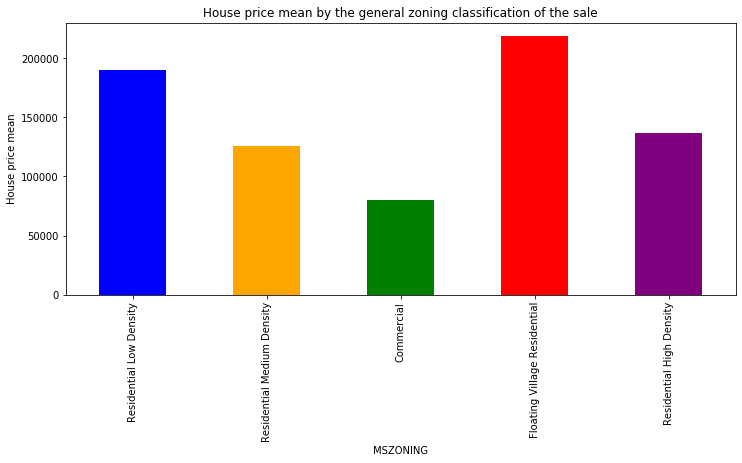

In [29]:
#mean price by MSZONING
ax=df_house.groupby(['MSZONING']).mean().reindex(['Residential Low Density', 'Residential Medium Density',\
                                                  'Commercial','Floating Village Residential',\
                                                  'Residential High Density'])['LASTSOLDPRICE'].plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])
ax.set_title('House price mean by the general zoning classification of the sale')
ax.set_ylabel('House price mean')

Text(0, 0.5, 'House price mean')

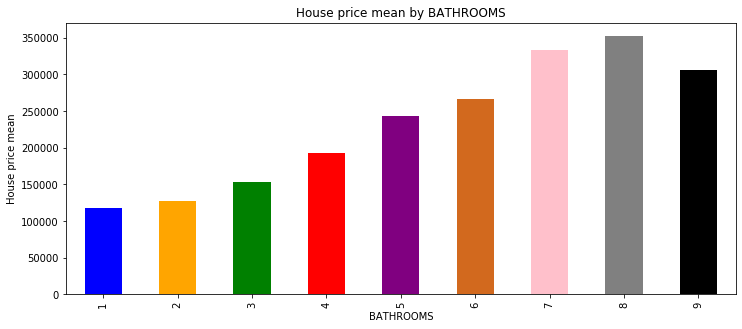

In [30]:
#mean price by BATHROOMS
ax=df_house.groupby(['BATHROOMS']).mean().reindex([1, 2, 3, 4, 5, 6, 7, 8, 9])['LASTSOLDPRICE'].plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])
ax.set_title('House price mean by BATHROOMS')
ax.set_ylabel('House price mean')

Text(0, 0.5, 'House price mean')

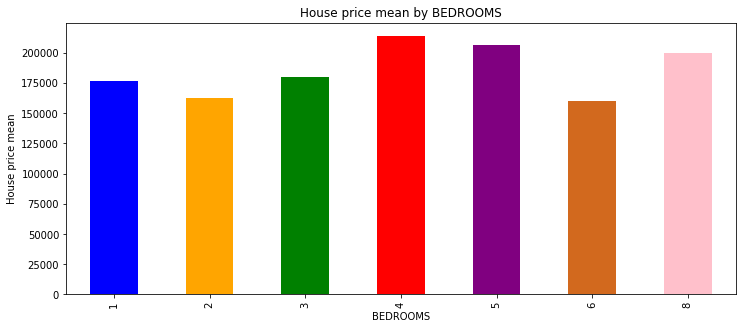

In [31]:
#mean price by BEDROOMS
ax=df_house.groupby(['BEDROOMS']).mean().reindex([1, 2, 3, 4, 5, 6, 8])['LASTSOLDPRICE'].plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])
ax.set_title('House price mean by BEDROOMS')
ax.set_ylabel('House price mean')

Text(0, 0.5, 'House price mean')

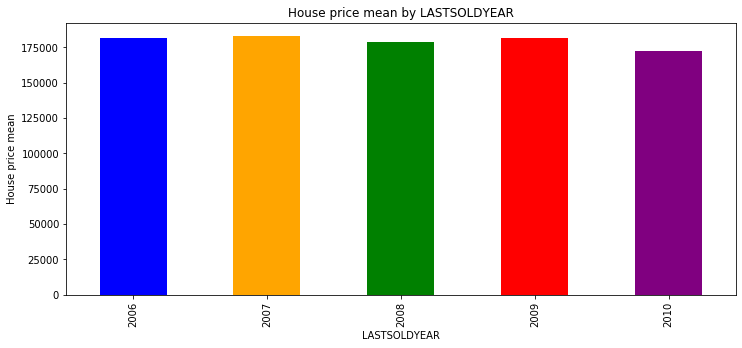

In [32]:
#mean price by LASTSOLDYEAR
ax=df_house.groupby(['LASTSOLDYEAR']).mean().reindex([2006,2007,2008,2009,2010])['LASTSOLDPRICE'].plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])
ax.set_title('House price mean by LASTSOLDYEAR')
ax.set_ylabel('House price mean')

Text(0, 0.5, 'House price mean')

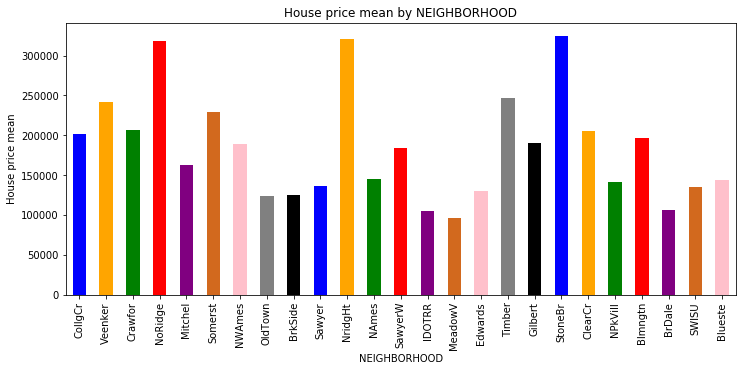

In [33]:
#mean price by NEIGHBORHOOD
ax=df_house.groupby(['NEIGHBORHOOD']).mean().reindex(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',\
                                                      'NWAmes','OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW',\
                                                      'IDOTRR','MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr',\
                                                      'NPkVill','Blmngtn', 'BrDale', 'SWISU', 'Blueste'])['LASTSOLDPRICE'].plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])
ax.set_title('House price mean by NEIGHBORHOOD')
ax.set_ylabel('House price mean')

Text(0, 0.5, 'House price mean')

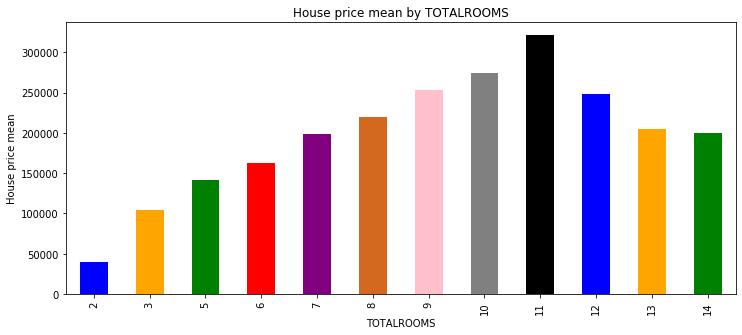

In [34]:
#mean price by TOTALROOMS
ax=df_house.groupby(['TOTALROOMS']).mean().reindex([2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])['LASTSOLDPRICE'].plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])
ax.set_title('House price mean by TOTALROOMS')
ax.set_ylabel('House price mean')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


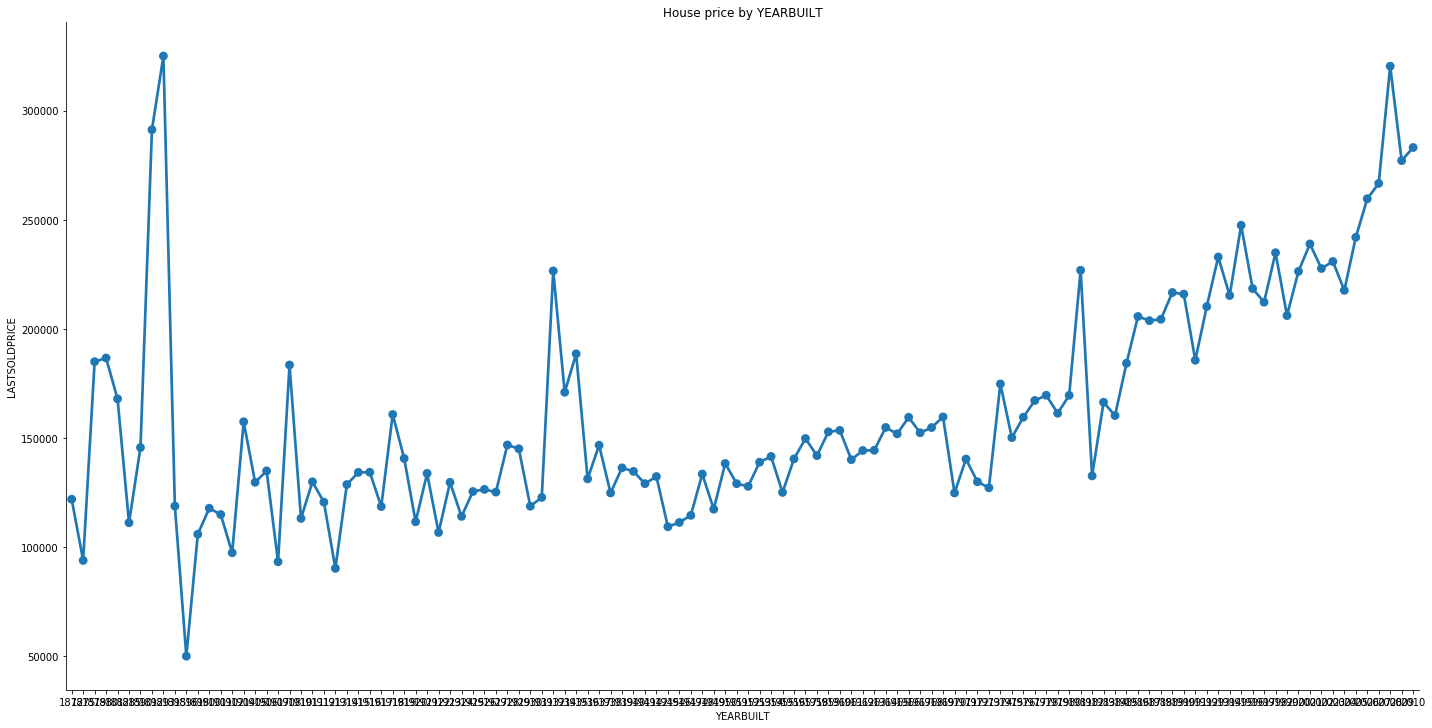

In [35]:

sns.factorplot('YEARBUILT', 
                  'LASTSOLDPRICE',  
                    estimator = np.mean, 
                    data = df_house, 
                   size = 10, 
                   aspect = 2, 
                    ci=None,
                   legend_out=False)
plt.title("House price by YEARBUILT")
plt.show()

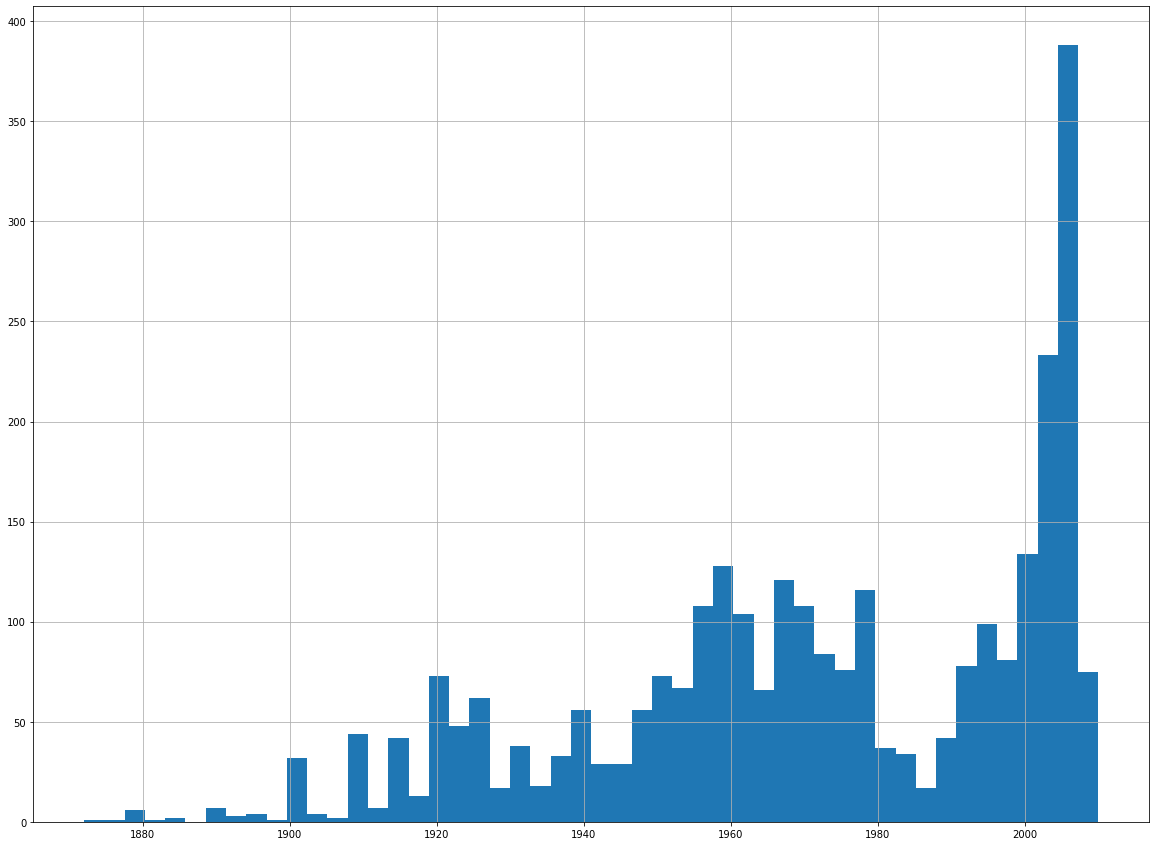

In [36]:
df_house.YEARBUILT.hist(bins=50, figsize=(20,15))
plt.savefig("YEARBUILT_histogram_plot")
plt.show()

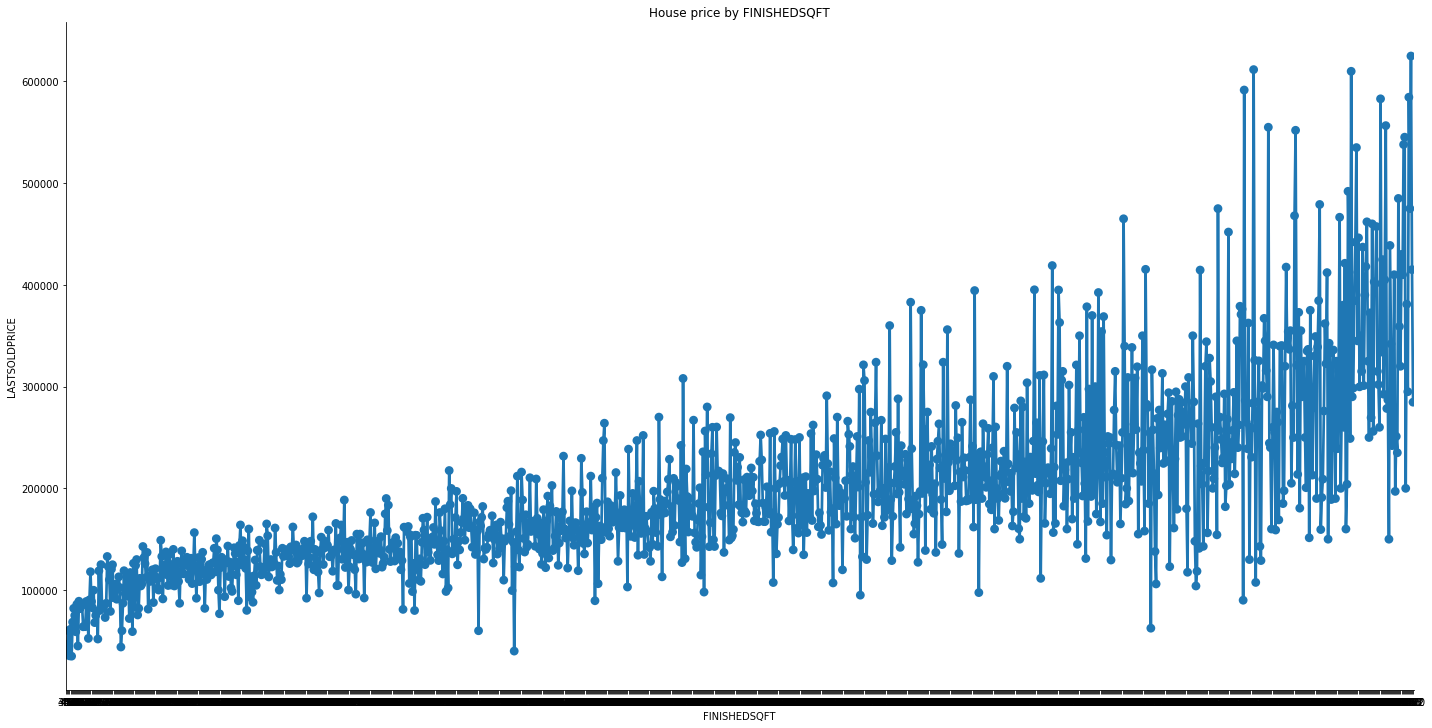

In [37]:

sns.factorplot('FINISHEDSQFT', 
                  'LASTSOLDPRICE',  
                    estimator = np.mean, 
                    data = df_house, 
                   size = 10, 
                   aspect = 2, 
                    ci=None,
                   legend_out=False)
plt.title("House price by FINISHEDSQFT")
plt.show()

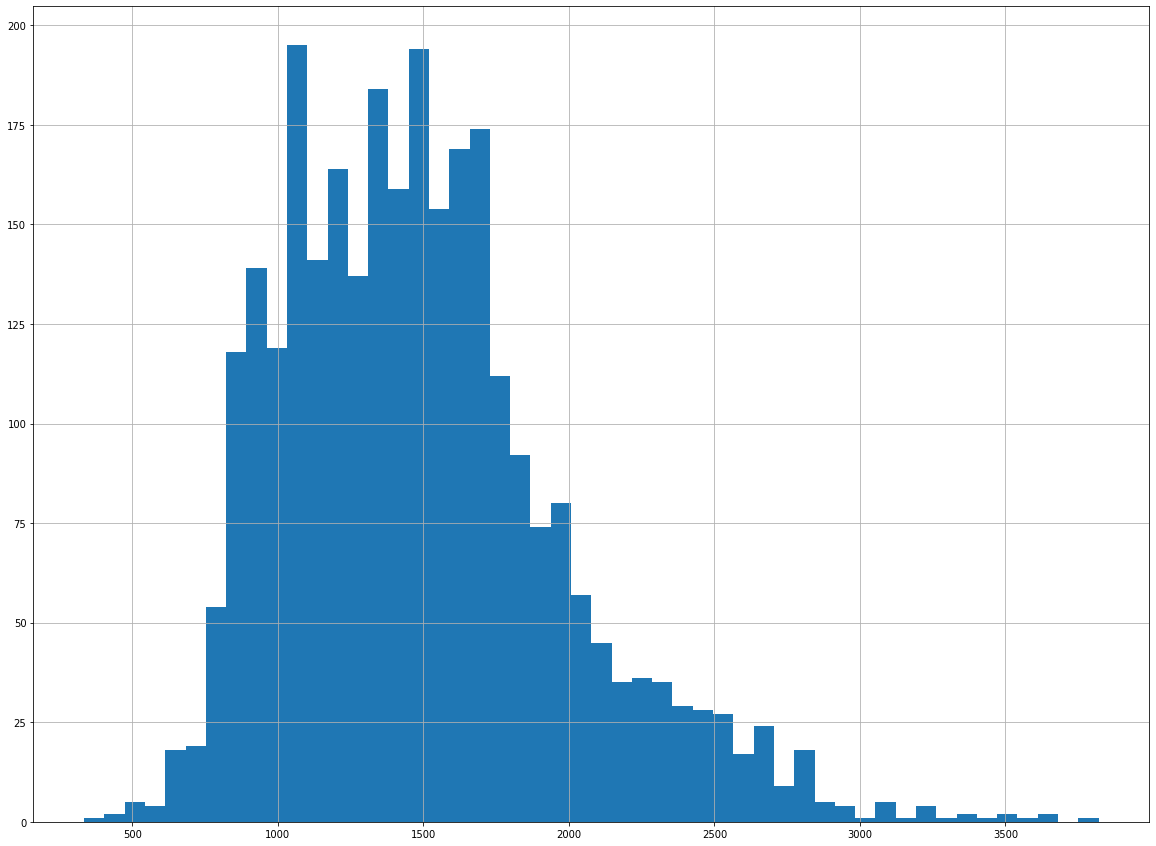

In [38]:
df_house.FINISHEDSQFT.hist(bins=50, figsize=(20,15))
plt.savefig("FINISHEDSQFT_histogram_plot")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'FINISHEDSQFT vs LASTSOLDYEAR by MSZONING')

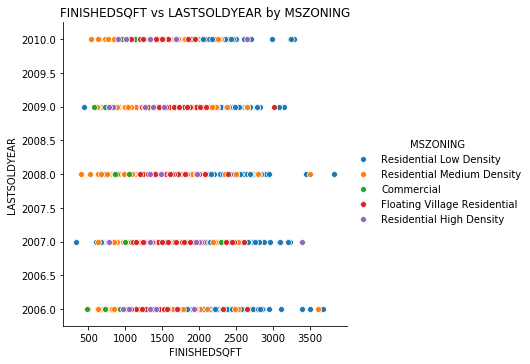

In [39]:
#move down
sns.pairplot(x_vars=['FINISHEDSQFT'], y_vars=['LASTSOLDYEAR'], data=df_house, hue ="MSZONING", size=5)
plt.title("FINISHEDSQFT vs LASTSOLDYEAR by MSZONING")

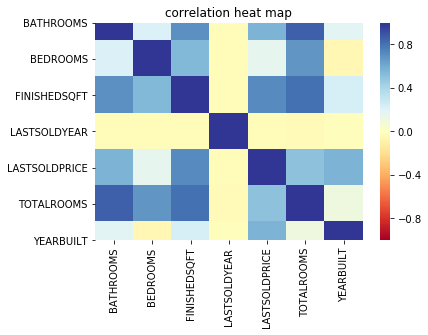

In [40]:
features=['BATHROOMS', 'BEDROOMS', 'FINISHEDSQFT','LASTSOLDYEAR',
          'LASTSOLDPRICE', 'TOTALROOMS','YEARBUILT']
sns.set_style()
corr = df_house[features].corr()
sns.heatmap(corr,cmap="RdYlBu",vmin=-1,vmax=1)
plt.title("correlation heat map")
plt.show()

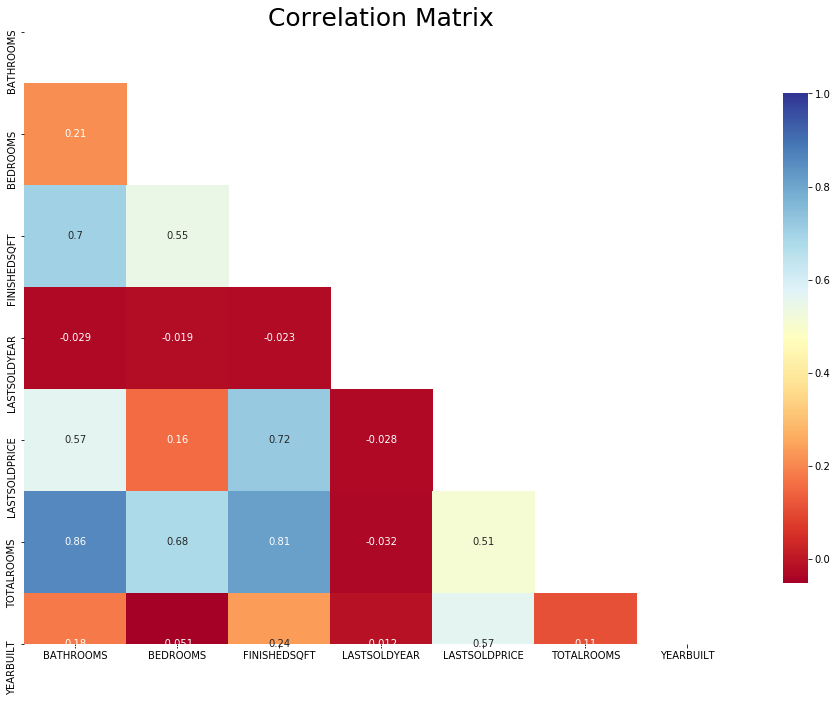

In [41]:
features=['BATHROOMS', 'BEDROOMS', 'FINISHEDSQFT','LASTSOLDYEAR',
          'LASTSOLDPRICE', 'TOTALROOMS','YEARBUILT']
mask = np.zeros_like(df_house[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=25)

sns.heatmap(df_house[features].corr(),vmax=1.0,square=True,cmap="RdYlBu", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75})

Now let’s look at how much each independent variable correlates with the last sold price.

In [42]:
corr_matrix = df_house.corr()
corr_matrix["LASTSOLDPRICE"].sort_values(ascending=False)

LASTSOLDPRICE    1.000000
FINISHEDSQFT     0.721444
PRICEPERSQFT     0.616791
BATHROOMS        0.567487
YEARBUILT        0.566500
TOTALROOMS       0.507473
BEDROOMS         0.157337
LASTSOLDYEAR    -0.027894
Name: LASTSOLDPRICE, dtype: float64

The last sold price tends to go up when the finished sqft and number of bathrooms go up. You can see a small negative correlation between the last sold year and the last sold price. Finally, coefficients close to zero mean that there is no linear correlation.

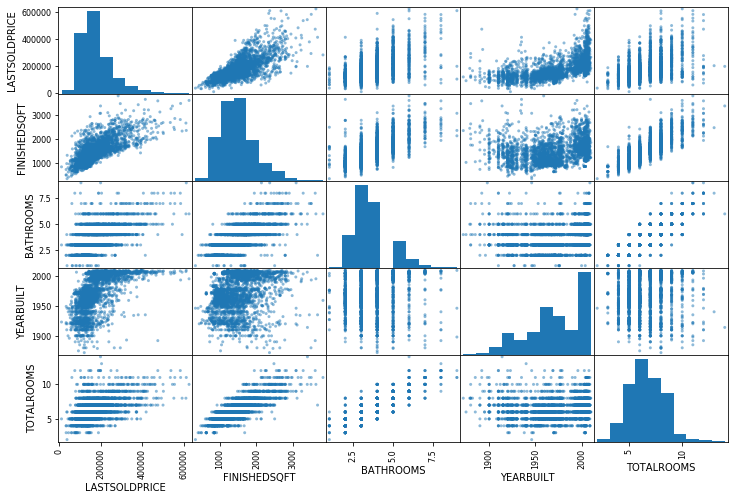

In [43]:
attributes = ["LASTSOLDPRICE", "FINISHEDSQFT", "BATHROOMS",'YEARBUILT','TOTALROOMS']
scatter_matrix(df_house[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable to predict the sold price is the finishedsqft, so let’s zoom in on their correlation scatterplot

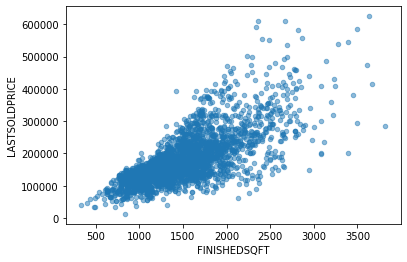

In [44]:
df_house.plot(kind="scatter", x="FINISHEDSQFT", y="LASTSOLDPRICE", alpha=0.5)
plt.savefig('scatter.png')

In [45]:
df_house.drop(df_house.columns[[6, 9]], axis=1, inplace=True)
df_house.head().T

,0,1,2,3,4
MSZONING,Residential Low Density,Residential Low Density,Residential Low Density,Residential Low Density,Residential Low Density
BATHROOMS,5,3,3,4,5
BEDROOMS,3,3,3,3,4
FINISHEDSQFT,1710,1262,1786,1717,2198
LASTSOLDYEAR,2008,2007,2008,2006,2008
LASTSOLDPRICE,208500,181500,223500,140000,250000
TOTALROOMS,8,6,6,7,9
YEARBUILT,2003,1976,2001,1915,2000
GROUP,HIGHPRICEHIGHFREQ,HIGHPRICELOWFREQ,HIGHPRICEHIGHFREQ,HIGHPRICEHIGHFREQ,HIGHPRICELOWFREQ


In [46]:
df_house.columns

Index(['MSZONING', 'BATHROOMS', 'BEDROOMS', 'FINISHEDSQFT', 'LASTSOLDYEAR',
       'LASTSOLDPRICE', 'TOTALROOMS', 'YEARBUILT', 'GROUP'],
      dtype='object')

In [47]:
df_house = df_house[['MSZONING', 'BATHROOMS', 'BEDROOMS', 'FINISHEDSQFT','LASTSOLDYEAR', 'LASTSOLDPRICE', 'TOTALROOMS',
       'YEARBUILT', 'GROUP']]
df_house.head().T

,0,1,2,3,4
MSZONING,Residential Low Density,Residential Low Density,Residential Low Density,Residential Low Density,Residential Low Density
BATHROOMS,5,3,3,4,5
BEDROOMS,3,3,3,3,4
FINISHEDSQFT,1710,1262,1786,1717,2198
LASTSOLDYEAR,2008,2007,2008,2006,2008
LASTSOLDPRICE,208500,181500,223500,140000,250000
TOTALROOMS,8,6,6,7,9
YEARBUILT,2003,1976,2001,1915,2000
GROUP,HIGHPRICEHIGHFREQ,HIGHPRICELOWFREQ,HIGHPRICEHIGHFREQ,HIGHPRICEHIGHFREQ,HIGHPRICELOWFREQ


First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.

# 5. Creating dummy variables

Create dummy variables for two categorical variables.

In [48]:
df_house_dummies=pd.get_dummies(df_house,columns=['MSZONING','GROUP'])
df_house_dummies.head().T

,0,1,2,3,4
BATHROOMS,5,3,3,4,5
BEDROOMS,3,3,3,3,4
FINISHEDSQFT,1710,1262,1786,1717,2198
LASTSOLDYEAR,2008,2007,2008,2006,2008
LASTSOLDPRICE,208500,181500,223500,140000,250000
TOTALROOMS,8,6,6,7,9
YEARBUILT,2003,1976,2001,1915,2000
MSZONING_Commercial,0,0,0,0,0
MSZONING_Floating Village Residential,0,0,0,0,0
MSZONING_Residential High Density,0,0,0,0,0


In [49]:
df_house_dummies = df_house_dummies.rename(columns={'MSZONING_Commercial': 'COMMERCIAL_ZONE',
                                                    'MSZONING_Floating Village Residential': 'VILLAGE_ZONE',
                                                    'MSZONING_Residential High Density': 'RESIDENTIAL_HIGH_DENSITY_ZONE',
                                                    'MSZONING_Residential Low Density': 'RESIDENTIAL_LOW_DENSITY_ZONE',
                                                    'MSZONING_Residential Medium Density': 'RESIDENTIAL_MEDIUM_DENSITY_ZONE',
                                                    'GROUP_HIGHPRICEHIGHFREQ': 'HIGH_PRICE_HIGH_FREQ_NEIGHBORHOOD', 
                                                    'GROUP_HIGHPRICELOWFREQ': 'HIGH_PRICE_LOW_FREQ_NEIGHBORHOOD',                                                     
                                                    'GROUP_LOWPRICE': 'LOW_PRICE_NEIGHBORHOOD'})

In [50]:
df_house_dummies.to_csv("df_house_dummies.csv",index=False)

In [51]:
df_house_dummies.columns

Index(['BATHROOMS', 'BEDROOMS', 'FINISHEDSQFT', 'LASTSOLDYEAR',
       'LASTSOLDPRICE', 'TOTALROOMS', 'YEARBUILT', 'COMMERCIAL_ZONE',
       'VILLAGE_ZONE', 'RESIDENTIAL_HIGH_DENSITY_ZONE',
       'RESIDENTIAL_LOW_DENSITY_ZONE', 'RESIDENTIAL_MEDIUM_DENSITY_ZONE',
       'HIGH_PRICE_HIGH_FREQ_NEIGHBORHOOD', 'HIGH_PRICE_LOW_FREQ_NEIGHBORHOOD',
       'LOW_PRICE_NEIGHBORHOOD'],
      dtype='object')

# 6. Split data to Train, Test & Validation sets

Spliting data:
80 % -train test
10%-valid test
10%-test test

In [52]:
X = df_house_dummies.drop("LASTSOLDPRICE",axis=1)
y = df_house_dummies["LASTSOLDPRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=100)

In [53]:
print("train df size="+str(len(X_train))+", valid df size="+ str(len(X_valid))+", test df size="+str(len(X_test))+ ", full df size="+ str(len(X)))

train df size=2318, valid df size=290, test df size=290, full df size=2898


# 7. Sanity check between full data to train set

#### verifing Distribution for some columns is simillar across full data and training

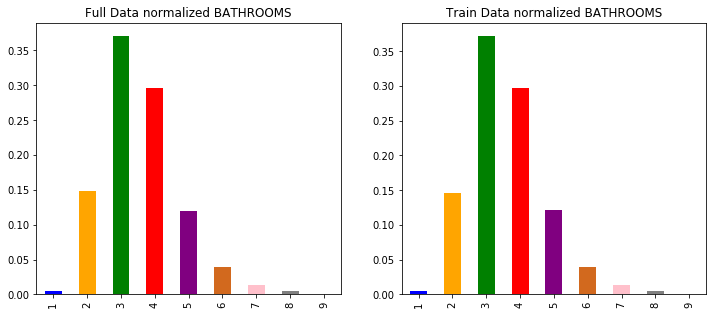

In [54]:
plt.subplot(1, 2, 1)
plt.title("Full Data normalized BATHROOMS")

pd.value_counts(df_house_dummies['BATHROOMS'].values,normalize=True).reindex([1, 2, 3, 4, 5, 6, 7, 8, 9]).plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])
plt.subplot(1, 2, 2)
plt.title("Train Data normalized BATHROOMS")

pd.value_counts(X_train['BATHROOMS'].values,normalize=True).reindex([1, 2, 3, 4, 5, 6, 7, 8, 9]).plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])

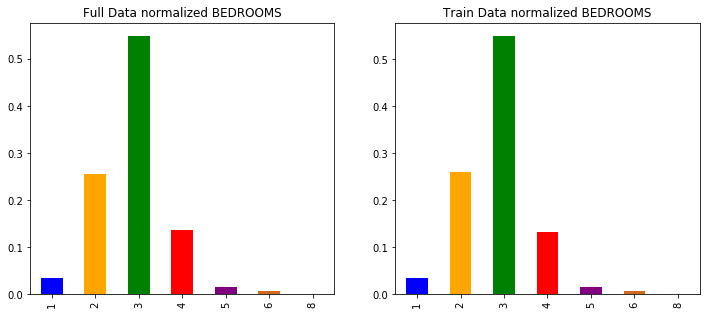

In [55]:
plt.subplot(1, 2, 1)
plt.title("Full Data normalized BEDROOMS")

pd.value_counts(df_house_dummies['BEDROOMS'].values,normalize=True).reindex([1, 2, 3, 4, 5, 6, 8]).plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])
plt.subplot(1, 2, 2)
plt.title("Train Data normalized BEDROOMS")

pd.value_counts(X_train['BEDROOMS'].values,normalize=True).reindex([1, 2, 3, 4, 5, 6, 8]).plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])

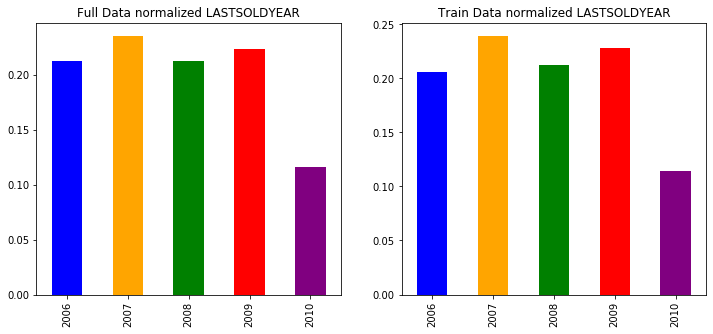

In [56]:
plt.subplot(1, 2, 1)
plt.title("Full Data normalized LASTSOLDYEAR")

pd.value_counts(df_house_dummies['LASTSOLDYEAR'].values,normalize=True).reindex([2006,2007,2008,2009,2010]).plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])
plt.subplot(1, 2, 2)
plt.title("Train Data normalized LASTSOLDYEAR")

pd.value_counts(X_train['LASTSOLDYEAR'].values,normalize=True).reindex([2006,2007,2008,2009,2010]).plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black'])

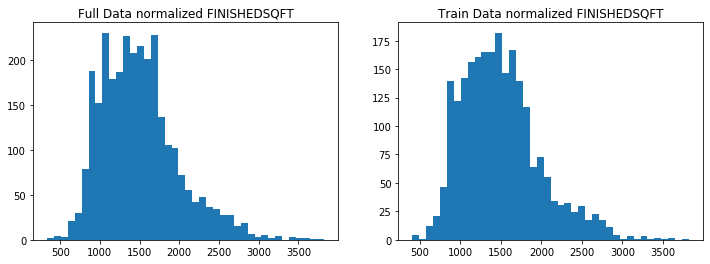

In [57]:

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.title("Full Data normalized FINISHEDSQFT")

plt.hist(X['FINISHEDSQFT'],bins=40);
plt.subplot(1, 2, 2)
plt.title("Train Data normalized FINISHEDSQFT")

plt.hist(X_train['FINISHEDSQFT'],bins=40);

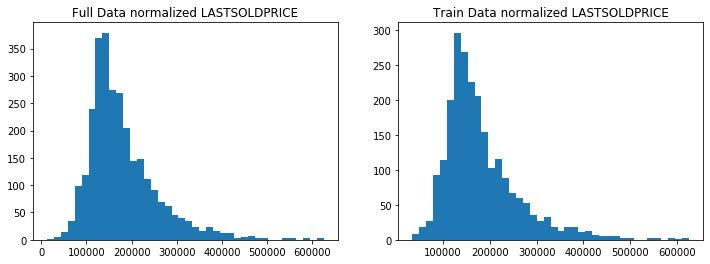

In [58]:

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.title("Full Data normalized LASTSOLDPRICE")

plt.hist(y,bins=40);
plt.subplot(1, 2, 2)
plt.title("Train Data normalized LASTSOLDPRICE")

plt.hist(y_train,bins=40);

# 8. Compare all features combinations on simple linear regression models on valid set

1. We will create all posible  combinations from all features (a dummy variable will be fully in a model or will not be at all- for example 'HIGH_PRICE_HIGH_FREQ_NEIGHBORHOOD','HIGH_PRICE_LOW_FREQ_NEIGHBORHOOD', will be together in a model or both will not be at all)
2. For each combination of features we will run linear regression algorithm , train on the train set and validate scores on the valid set.
3. We will look on the best scores and choose the feautres of the best model
4. We will run RandomForestRegressor, with the features selected and see if it improves our results
5. We will use grid search for chosen algorithm for choosing best params

In [59]:
df_house_dummies= pd.read_csv('df_house_dummies.csv')

In [60]:
df_house_dummies.columns

Index(['BATHROOMS', 'BEDROOMS', 'FINISHEDSQFT', 'LASTSOLDYEAR',
       'LASTSOLDPRICE', 'TOTALROOMS', 'YEARBUILT', 'COMMERCIAL_ZONE',
       'VILLAGE_ZONE', 'RESIDENTIAL_HIGH_DENSITY_ZONE',
       'RESIDENTIAL_LOW_DENSITY_ZONE', 'RESIDENTIAL_MEDIUM_DENSITY_ZONE',
       'HIGH_PRICE_HIGH_FREQ_NEIGHBORHOOD', 'HIGH_PRICE_LOW_FREQ_NEIGHBORHOOD',
       'LOW_PRICE_NEIGHBORHOOD'],
      dtype='object')

In [61]:
modelInput=[['BATHROOMS'],
            ['BEDROOMS'],
            ['FINISHEDSQFT'],            
            ['LASTSOLDYEAR'],             
            ['TOTALROOMS'],             
            ['YEARBUILT'],
            ['COMMERCIAL_ZONE'],
            ['VILLAGE_ZONE'],            
            ['RESIDENTIAL_HIGH_DENSITY_ZONE'],             
            ['RESIDENTIAL_LOW_DENSITY_ZONE'],             
            ['RESIDENTIAL_MEDIUM_DENSITY_ZONE'],   
            ['HIGH_PRICE_HIGH_FREQ_NEIGHBORHOOD'],             
            ['HIGH_PRICE_LOW_FREQ_NEIGHBORHOOD'],             
            ['LOW_PRICE_NEIGHBORHOOD']]

In [62]:
import itertools
#function that gets a list->returns all cobinations of list (example: for [1,2,3] will return 1,2,3,[1,3],[1,2],[2,3],[1,2,3])
def sublists(input):
    for length in range(1,len(input) + 1):
        yield from itertools.combinations(input, length)
#apply function on all features
modelsFeatures=list(sublists(modelInput))

In [63]:
#creating data frame the will contain scores per each model
summaryDf = pd.DataFrame(columns=['ModelColumns','MAE','MSE','RMSE','RSQUARE'])

In [64]:
from sklearn import metrics
#For each model we will train on the train set and validate scores on the valid set and add to dummary data frame.
for current_features in modelsFeatures:
    modelFeatures=[item for sublist in current_features for item in sublist]
    lm = LinearRegression()
    model_X_train=X_train[modelFeatures]
    lm.fit(model_X_train,y_train)
    model_X_valid=X_valid[modelFeatures]
    predictions_valid_set = lm.predict(model_X_valid)

    
    MAE=metrics.mean_absolute_error(y_valid, predictions_valid_set)
    MSE=metrics.mean_squared_error(y_valid, predictions_valid_set)
    RMSE=np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid_set))
    RSQUARED=metrics.explained_variance_score(y_valid, predictions_valid_set)

    summaryDf = summaryDf.append({'ModelColumns':','.join(modelFeatures),'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'RSQUARE':RSQUARED}, ignore_index=True)

In [65]:
print("Number of models compared")
print(summaryDf.shape[0])

Number of models compared
16383


### looking at 10 best scores by RMSE


In [66]:
summaryDf.sort_values(by='RMSE').head(10)

,ModelColumns,MAE,MSE,RMSE,RSQUARE
5014,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_LO...",28186.556947,1.501666e+09,38751.334869,0.711415
8595,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_LO...",28186.556947,1.501666e+09,38751.334869,0.711415
5013,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_LO...",28186.556947,1.501666e+09,38751.334869,0.711415
5012,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_LO...",28186.556947,1.501666e+09,38751.334869,0.711415
8587,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_HI...",28187.926980,1.501751e+09,38752.435554,0.711405
8585,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_HI...",28187.926980,1.501751e+09,38752.435554,0.711405
8586,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_HI...",28187.926980,1.501751e+09,38752.435554,0.711405
12054,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_HI...",28187.926980,1.501751e+09,38752.435554,0.711405
8576,"BEDROOMS,FINISHEDSQFT,YEARBUILT,VILLAGE_ZONE,R...",28271.093005,1.505285e+09,38798.006488,0.710721
8577,"BEDROOMS,FINISHEDSQFT,YEARBUILT,VILLAGE_ZONE,R...",28271.093005,1.505285e+09,38798.006488,0.710721


In [67]:
#adding column to summary df ->number of columns in feature
summaryDf["NUM_FEATURES"]=summaryDf.ModelColumns.apply(lambda x: len(x.split(",")))

In [68]:

summaryDf.sort_values(by='RSQUARE', ascending=False).head()

,ModelColumns,MAE,MSE,RMSE,RSQUARE,NUM_FEATURES
5013,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_LO...",28186.556947,1.501666e+09,38751.334869,0.711415,6
5014,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_LO...",28186.556947,1.501666e+09,38751.334869,0.711415,6
8595,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_LO...",28186.556947,1.501666e+09,38751.334869,0.711415,7
5012,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_LO...",28186.556947,1.501666e+09,38751.334869,0.711415,6
8587,"BEDROOMS,FINISHEDSQFT,YEARBUILT,RESIDENTIAL_HI...",28187.926980,1.501751e+09,38752.435554,0.711405,7


In [69]:
print("Number of models with over 0.71 R-square value")
print(summaryDf[summaryDf["RSQUARE"]>0.71].shape[0])


Number of models with over 0.71 R-square value
50


### There are 50 models that give R-square value ~ 0.71
To minimize complexity of model I will choose my model to be the model that is R-square value is greater than 0.71 with minimum features


In [70]:
print("Model with R-square value over 0.71 and minimum features")
chosenModel=summaryDf[summaryDf["RSQUARE"]>0.71].sort_values(by='NUM_FEATURES').head(1).ModelColumns.iloc[0].split(",")
chosenModel

Model with R-square value over 0.71 and minimum features


['BEDROOMS',
 'FINISHEDSQFT',
 'YEARBUILT',
 'RESIDENTIAL_LOW_DENSITY_ZONE',
 'LOW_PRICE_NEIGHBORHOOD']

#### Selected features:['BEDROOMS', 'FINISHEDSQFT', 'YEARBUILT', RESIDENTIAL_LOW_DENSITY_ZONE', 'LOW_PRICE_NEIGHBORHOOD']

In [71]:
chosenModel=['BEDROOMS','FINISHEDSQFT','YEARBUILT','RESIDENTIAL_LOW_DENSITY_ZONE','LOW_PRICE_NEIGHBORHOOD']

### Running LinearRegression on selected features

In [72]:
lm =LinearRegression()
model_X_train=X_train[chosenModel]
lm.fit(model_X_train,y_train)
model_X_valid=X_valid[chosenModel]
predictions_valid_set = lm.predict(model_X_valid)

In [73]:
MAE=metrics.mean_absolute_error(y_valid, predictions_valid_set)
MSE=metrics.mean_squared_error(y_valid, predictions_valid_set)
RMSE=np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid_set))
RSQUARED=metrics.explained_variance_score(y_valid, predictions_valid_set)

In [74]:
print('MAE:', MAE)
print('MSE:',MSE )
print('RMSE:',RMSE )
print('RSQUARED:', RSQUARED)

MAE: 28256.11276597279
MSE: 1506850482.1162236
RMSE: 38818.17206046961
RSQUARED: 0.7104028110119887


In [75]:
print("Model Intercept:  ",lm.intercept_)


Model Intercept:   -1365630.0535159262


In [76]:
coeffecients = pd.DataFrame(lm.coef_,model_X_train.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
BEDROOMS,-23232.012716
FINISHEDSQFT,120.110638
YEARBUILT,728.596274
RESIDENTIAL_LOW_DENSITY_ZONE,14221.151647
LOW_PRICE_NEIGHBORHOOD,-25449.913508


# 9. Compare RandomForestRegressor model with selected features from step 8

In [77]:
lm = RandomForestRegressor(random_state=100)
model_X_train=X_train[chosenModel]
lm.fit(model_X_train,y_train)
model_X_valid=X_valid[chosenModel]
predictions_valid_set = lm.predict(model_X_valid)

In [78]:
MAE=metrics.mean_absolute_error(y_valid, predictions_valid_set)
MSE=metrics.mean_squared_error(y_valid, predictions_valid_set)
RMSE=np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid_set))
RSQUARED=metrics.explained_variance_score(y_valid, predictions_valid_set)

In [79]:
print('MAE:', MAE)
print('MSE:',MSE )
print('RMSE:',RMSE )
print('RSQUARED:', RSQUARED)

MAE: 22575.627644120246
MSE: 1157729930.8739443
RMSE: 34025.430649353206
RSQUARED: 0.7776289660468229


#### RandomForestRegressor gives better results

# 10.Predict+Evaluate on test set with chosen model

## 10.1 Predict

1. Take the chosen model features and extract columns from train set
2. Train the data
3. Predict with the model the test set

In [80]:

lm = RandomForestRegressor(random_state=100)
model_X_train=X_train[chosenModel]
lm.fit(model_X_train,y_train)
model_X_test=X_test[chosenModel]
predictions_test_set = lm.predict(model_X_test)

## 10.2 Evaluate


In [81]:
MAE=metrics.mean_absolute_error(y_test, predictions_test_set)
MSE=metrics.mean_squared_error(y_test, predictions_test_set)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, predictions_test_set))
RSQUARED=metrics.explained_variance_score(y_test, predictions_test_set)

In [82]:
print('MAE:', MAE)
print('MSE:',MSE )
print('RMSE:',RMSE )
print('RSQUARED:', RSQUARED)

MAE: 24616.480119978678
MSE: 1198364311.001247
RMSE: 34617.398963545005
RSQUARED: 0.7826825798570942


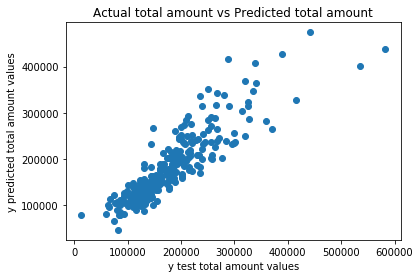

In [83]:
plt.scatter(y_test,predictions_test_set)
plt.xlabel('y test total amount values')
plt.ylabel("y predicted total amount values")
plt.title("Actual total amount vs Predicted total amount")
plt.show()

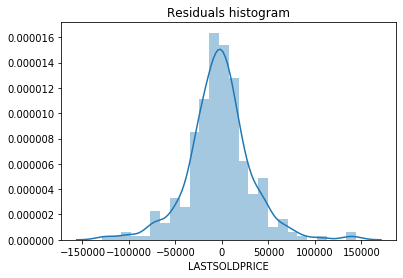

In [84]:
sns.distplot((y_test-predictions_test_set));
plt.title("Residuals histogram")
plt.show()

### The residuals are normally distributed- good indication that the model predicted pretty well for the data

# 11. Real time predictions

Now our model has been built, let me use it for real time predictions.

In [85]:
chosenModel

['BEDROOMS',
 'FINISHEDSQFT',
 'YEARBUILT',
 'RESIDENTIAL_LOW_DENSITY_ZONE',
 'LOW_PRICE_NEIGHBORHOOD']

In [87]:
a = int(input("Please enter the number of bathrooms in the house:"))
b = int(input("Please enter the size of the house in square feet:"))
c = int(input("Please enter the original construction year:"))
d = int(input("Is the house located in a Residential Low Density zone (1 if yes, 0 otherwise):"))
e = int(input("Is the house located in one of the following neighbourhoods: Briardale, Brookside, Edwards, Gilbert, Iowa DOT and Rail Road, Meadow Village, North Ames, Northpark Villa, Northwest Ames, Old Town, South & West of Iowa State University, or Sawyer West (1 if yes, 0 otherwise):"))
new_data = np.array([a,b,c,d,e]).reshape(1,-1)
new_pred=lm.predict(new_data)

print("\033[1m The estimated price for that house is : $ \033[1m ",float(new_pred[0]))

Please enter the number of bathrooms in the house:3
Please enter the size of the house in square feet:960
Please enter the original construction year:1965
Is the house located in a Residential Low Density zone (1 if yes, 0 otherwise):1
Is the house located in one of the following neighbourhoods: Briardale, Brookside, Edwards, Gilbert, Iowa DOT and Rail Road, Meadow Village, North Ames, Northpark Villa, Northwest Ames, Old Town, South & West of Iowa State University, or Sawyer West (1 if yes, 0 otherwise):1
 The estimated price for that house is : $   109559.0


Type Markdown and LaTeX: 𝛼2